# 🎰 Multi-Armed Bandit (MAB) Problem 

The Multi-Armed Bandit problem is a classic problem in probability theory and decision-making that captures the essence of balancing exploration and exploitation. This problem is named after the scenario of a gambler facing multiple slot machines (bandits) and needing to determine which machine to play to maximize their rewards. The MAB problem has significant applications in various fields, including online advertising, clinical trials, adaptive routing in networks, and more.

## ✅ What is it?
A decision-making problem where:
- You have **multiple options (arms)** with unknown rewards.
- Goal: **maximize total reward** over time.

This involves the classic **exploration vs. exploitation** trade-off.

---

## 📊 Key Terms
- **Arm**: One of the available options.
- **Reward**: The payoff you get from choosing an arm.
- **Exploitation**: Choosing the best-known arm.
- **Exploration**: Trying other arms to discover better options.

---

## 🧠 Strategies

### 1. ε-Greedy
- With probability ε: **explore** (pick a random arm).
- With probability 1–ε: **exploit** (choose the best-known arm).
- Simple but might miss better options if ε is too small.

### 2. Upper Confidence Bound (UCB1)
- Picks the arm with: *UCB = average reward + exploration bonus *
- Balances reward and uncertainty.
- More efficient and adaptive than ε-Greedy.

### 3. Thompson Sampling
- Uses probability distributions to sample and pick arms.
- Naturally balances exploration and exploitation.
- Often performs better in practice.

---

## 🕹️ Applications
- Online advertising
- A/B testing
- Recommendation systems
- Game AI

---

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
def plot_bandit_results(n_rounds, total_rewards, chosen_arms):
    """
    Function to plot the results of any multi-armed bandit algorithm.
    :param n_rounds: Number of rounds (e.g., 1000).
    :param total_rewards: List of rewards obtained in each round.
    :param chosen_arms: List of arms chosen in each round (0, 1, 2...).
    """
    # Cumulative reward
    cumulative_rewards = np.cumsum(total_rewards)

    # Color map for arms
    colors = ['red', 'blue', 'green']
    arm_colors = [colors[a] for a in chosen_arms]

    # Scatter plot with colored points per arm
    plt.figure(figsize=(10, 5))
    plt.scatter(range(n_rounds), cumulative_rewards, c=arm_colors, s=10)
    plt.xlabel("Round")
    plt.ylabel("Cumulative Reward")
    plt.title("Bandit Algorithm – Colored by Arm Chosen")
    plt.grid(True)
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Arm 0', markerfacecolor='red', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='Arm 1', markerfacecolor='blue', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='Arm 2', markerfacecolor='green', markersize=8)
    ])
    plt.show()

# · Epsilon-Greedy

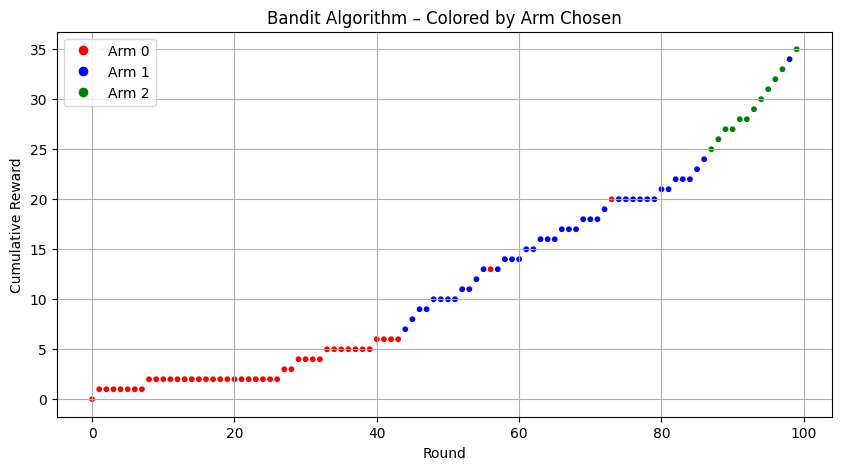

In [ ]:
# Simulated true reward probabilities for each arm
true_probs = [0.1, 0.5, 0.8]  # Arm 2 is the best
n_arms = len(true_probs)

# ε-greedy parameters
epsilon = 0.1
n_rounds = 100

# Tracking
counts = np.zeros(n_arms)       # Times each arm is pulled
rewards = np.zeros(n_arms)      # Total reward from each arm
total_rewards = []
chosen_arms = []

for t in range(n_rounds):
    # Exploration
    if np.random.rand() < epsilon:
        arm = np.random.randint(n_arms)
    # Exploitation
    else:
        avg_rewards = rewards / (counts + 1e-5)  # Avoid divide by zero
        arm = np.argmax(avg_rewards)
    
    # Simulate pulling the chosen arm
    reward = 1 if np.random.rand() < true_probs[arm] else 0
    
    # Update tracking
    counts[arm] += 1
    rewards[arm] += reward
    total_rewards.append(reward)
    chosen_arms.append(arm)

# Plot cumulative reward
plot_bandit_results(n_rounds, total_rewards, chosen_arms)

- Exploration: With 10% (epsilon) chance, pick a random arm
- Esploitation : With 90% chance, pick the arm with the highest average reward so far

In [ ]:
if np.random.rand() < epsilon:
    arm = np.random.randint(n_arms)  # Explore
else:
    avg_rewards = rewards / (counts + 1e-5)  # Exploit
    arm = np.argmax(avg_rewards)

This simulates if the slot give benefit or no

In [ ]:
prob = 0.7
reward = 1 if np.random.rand() < prob else 0

# · Upper Confidence Bound (UCB1)

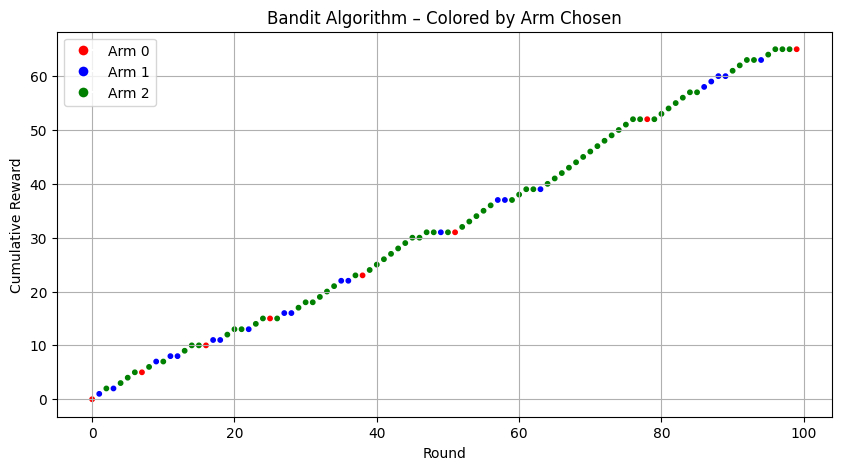

In [67]:
true_probs = [0.1, 0.5, 0.8]  # True reward probabilities for each arm
n_arms = len(true_probs)

# Tracking
counts = np.zeros(n_arms)
rewards = np.zeros(n_arms)
total_rewards = []
chosen_arms = []

for t in range(n_rounds):
    # Calculate UCB for each arm
    if t < n_arms:
        arm = t  # Choose each arm at least once initially
    else:
        ucb_values = (rewards / (counts + 1e-5)) + np.sqrt(2 * np.log(t + 1) / (counts + 1e-5))
        arm = np.argmax(ucb_values)  # Choose the arm with the highest UCB value

    # Simulate pulling the arm
    reward = 1 if np.random.rand() < true_probs[arm] else 0

    # Update tracking
    counts[arm] += 1
    rewards[arm] += reward
    total_rewards.append(reward)
    chosen_arms.append(arm)

# Call the common plotting function
plot_bandit_results(n_rounds, total_rewards, chosen_arms)


- **Exploitation**: choosing the arm with the highest average reward.
- **Exploration**: trying less-selected arms to discover better options.

---

### 📐 UCB1 Formula

For each arm \( i \), UCB1 computes:

$\text{UCB}_i(t) = \bar{x}_i + \sqrt{\frac{2 \ln t}{n_i}}$

Where:

- $\bar{x}_i $: average reward of arm $i$
- $n_i$: number of times arm $i$ has been selected
- $t$: total number of rounds

The second term is a confidence bound that encourages exploration of less-tried arms.

---

### 🔍 Intuition

- $\bar{x}_i$ : promotes **exploitation** (choose best-known arm).
- $\sqrt{\frac{2 \ln t}{n_i}}$ : promotes **exploration** (try underused arms).

At each step, the algorithm selects the arm with the highest UCB value.


# · Thompson Sampling

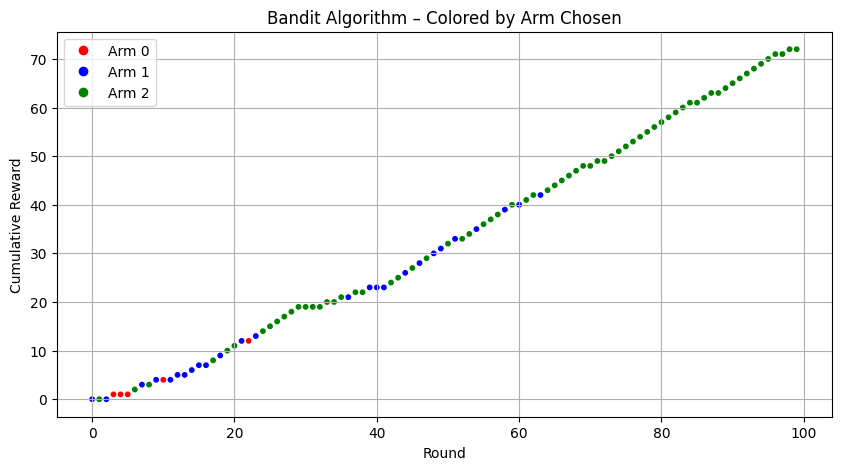

In [ ]:
true_probs = [0.1, 0.5, 0.8]  # True reward probabilities for each arm
n_arms = len(true_probs)

# Tracking
successes = np.zeros(n_arms)  # Successes for each arm
failures = np.zeros(n_arms)  # Failures for each arm
total_rewards = []
chosen_arms = []

for t in range(n_rounds):
    # Sample from the Beta distribution for each arm
    theta = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(n_arms)]
    arm = np.argmax(theta)  # Choose the arm with the highest sampled value

    # Simulate pulling the arm
    reward = 1 if np.random.rand() < true_probs[arm] else 0

    # Update tracking
    if reward == 1:
        successes[arm] += 1
    else:
        failures[arm] += 1
    total_rewards.append(reward)
    chosen_arms.append(arm)

# Call the common plotting function
plot_bandit_results(n_rounds, total_rewards, chosen_arms)

- **Exploitation**: choosing the arm that likely gives the best reward.
- **Exploration**: occasionally trying other arms due to uncertainty.

---

### 📐 Core Idea

For each arm \( i \), Thompson Sampling maintains a Beta distribution:

$$
\theta_i \sim \text{Beta}(\alpha_i, \beta_i)
$$

Where:
- $ \alpha_i$ : number of **successes** for arm $i$
- $ \beta_i$ : number of **failures** for arm $i$

At each round:
1. Sample $\theta_i$ from each arm's distribution.
2. Select the arm with the highest $\theta_i$.
3. Observe the reward  $r \in\{0, 1\}$ .
4. Update:
   - If $r = 1$ : increment $ \alpha_i $
   - If $r = 0$ : increment $ \beta_i $

---

### ✅ Intuition

Thompson Sampling uses sampling from the posterior to:
- Favor arms with better estimated rewards.
- Still explore uncertain arms due to randomness in sampling.


# $Conclusion$

The *Multi-Armed Bandit* problem is a foundational problem in decision-making and *reinforcement learning*, offering valuable insights into balancing exploration and exploitation. The algorithms discussed, including Epsilon-Greedy, UCB, and Thompson Sampling, each provide unique approaches to solving this problem, with applications spanning various domains. Understanding and implementing these strategies can lead to significant improvements in systems that require adaptive and efficient decision-making.

---


This table compares three popular algorithms for the **Multi-Armed Bandit** problem:

| Algorithm           | Performance      | Ease of Use | Theory Backing | Real-World Use |
|---------------------|------------------|-------------|----------------|----------------|
| **ε-Greedy**        | ⭐⭐               | ⭐⭐⭐⭐        | ⭐⭐             | ⭐⭐             |
| **UCB1**            | ⭐⭐⭐⭐             | ⭐⭐          | ⭐⭐⭐⭐           | ⭐⭐⭐            |
| **Thompson Sampling** | ⭐⭐⭐⭐⭐         | ⭐⭐⭐         | ⭐⭐⭐            | ⭐⭐⭐⭐⭐          |

---

### ✅ Most Used

**Thompson Sampling** is the most commonly used in industry because:

- It performs very well empirically.
- It naturally balances exploration and exploitation.
- It is widely adopted in A/B testing, advertising, and recommendation systems.

---

### 🏆 Best Performer

- **Thompson Sampling** generally achieves **lower regret** than the others in practical settings.
- **UCB1** performs well with strong theoretical guarantees but is more conservative.
- **ε-Greedy** is easy to implement but less efficient in exploration.

---

### 🔍 Summary

- **Best overall**: ✅ **Thompson Sampling**
- **Best for simple setups**: 🔁 **ε-Greedy**
- **Best for theoretical confidence**: 📏 **UCB1**